# 📊 Statistical Significance Testing: Cost by Irrigation System

This notebook performs statistical tests to determine if cost differences between irrigation systems are statistically significant.

**Analysis includes:**
- T-tests for each cost category
- Effect size calculations
- Visualizations of cost distributions
- Summary of significant findings

---

## 1. Setup and Data Loading

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure settings
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


In [19]:
# Load dataset
df = pd.read_excel('Irrigation_DS_Clean.xlsx')

print("✓ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✓ Dataset loaded successfully!
Shape: 30 rows × 55 columns


## 2. Identify Cost Columns

In [20]:
# Identify all cost-related columns
all_columns = df.columns.tolist()
cost_columns = [col for col in all_columns if 'Cost' in col or 'cost' in col.lower()]

print(f"Total cost-related columns found: {len(cost_columns)}")
print("\nAll cost columns:")
for i, col in enumerate(cost_columns, 1):
    print(f"{i:2d}. {col}")

Total cost-related columns found: 21

All cost columns:
 1. land_prep_plowing_cost_per_acre
 2. land_prep_settlement_cost_per_acre
 3. land_prep_division_cost_per_acre
 4. land_prep_terracing_cost_per_acre
 5. land_prep_total_cost
 6. land_prep_labor_total_cost
 7. land_prep_grand_total_cost
 8. nursery_prep_total_cost
 9. cultivation_labor_total_cost
10. fertilizer_cost_yer
11. fertilizer_total_cost
12. production_total_harvest_cost
13. production_harvest_labor_cost
14. production_final_harvest_cost_yer
15. pest_control_chemical_materials_cost
16. pest_control_labor_total_cost
17. pest_control_grand_total_cost
18. water_diesel_cost
19. water_labor_total_cost
20. water_grand_total_cost
21. water_diesel_cost_last_month


In [21]:
# Focus on major cost categories (Grand Total costs)
major_cost_columns = [
    'land_prep_grand_total_cost',
    'fertilizer_total_cost',
    'pest_control_grand_total_cost',
    'water_grand_total_cost',
    'production_final_harvest_cost_yer'
]

# Filter to only existing columns
existing_major_costs = [col for col in major_cost_columns if col in df.columns]

print("\nMajor cost categories for analysis:")
print("=" * 100)
for i, col in enumerate(existing_major_costs, 1):
    print(f"{i}. {col.replace('_', ' ')}")

print(f"\nTotal major cost categories: {len(existing_major_costs)}")


Major cost categories for analysis:
1. land prep grand total cost
2. fertilizer total cost
3. pest control grand total cost
4. water grand total cost
5. production final harvest cost yer

Total major cost categories: 5


## 3. Data Preparation and Verification

In [22]:
# Check irrigation system types
if 'irrigation_system_type' in df.columns:
    irrigation_types = df['irrigation_system_type'].unique()
    irrigation_counts = df['irrigation_system_type'].value_counts()
    
    print("Irrigation System Types:")
    print("=" * 100)
    for system, count in irrigation_counts.items():
        print(f"  • {system}: {count} farms ({count/len(df)*100:.1f}%)")
    
    print(f"\nTotal irrigation system types: {len(irrigation_types)}")
else:
    print("⚠ Warning: 'Irrigation_System_Type' column not found!")

Irrigation System Types:
  • Traditional: 15 farms (50.0%)
  • Drip: 15 farms (50.0%)

Total irrigation system types: 2


In [23]:
# Check data quality for cost columns
print("Data Quality Check - Cost Columns:")
print("=" * 100)

quality_df = pd.DataFrame({
    'Column': existing_major_costs,
    'Non-Null': [df[col].notna().sum() for col in existing_major_costs],
    'Null': [df[col].isna().sum() for col in existing_major_costs],
    'Mean': [df[col].mean() for col in existing_major_costs],
    'Std': [df[col].std() for col in existing_major_costs]
})

display(quality_df)

Data Quality Check - Cost Columns:


,Column,Non-Null,Null,Mean,Std
0,land_prep_grand_total_cost,30,0,49466.67,52379.24
1,fertilizer_total_cost,30,0,39973.33,39314.72
2,pest_control_grand_total_cost,30,0,29013.33,30625.75
3,water_grand_total_cost,30,0,76857.33,41625.78
4,production_final_harvest_cost_yer,28,2,177650.00,624818.56


## 4. Descriptive Statistics by Irrigation System

In [24]:
# Calculate descriptive statistics for each cost category by irrigation system
print("DESCRIPTIVE STATISTICS BY IRRIGATION SYSTEM")
print("=" * 100)

for cost_col in existing_major_costs:
    print(f"\n{cost_col.replace('_', ' ')}:")
    print("-" * 100)
    
    stats_by_system = df.groupby('irrigation_system_type')[cost_col].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std Dev', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(2)
    
    display(stats_by_system)

DESCRIPTIVE STATISTICS BY IRRIGATION SYSTEM

land prep grand total cost:
----------------------------------------------------------------------------------------------------


,Count,Mean,Median,Std Dev,Min,Max
irrigation_system_type,,,,,,
Drip,15,21733.33,20000.00,22992.13,0,70000
Traditional,15,77200.00,86000.00,59214.44,0,173000



fertilizer total cost:
----------------------------------------------------------------------------------------------------


,Count,Mean,Median,Std Dev,Min,Max
irrigation_system_type,,,,,,
Drip,15,25380.00,20000.00,27670.10,0,84000
Traditional,15,54566.67,37500.00,44493.93,0,144000



pest control grand total cost:
----------------------------------------------------------------------------------------------------


,Count,Mean,Median,Std Dev,Min,Max
irrigation_system_type,,,,,,
Drip,15,22133.33,21000.00,20420.11,0,69000
Traditional,15,35893.33,26000.00,37741.97,0,107000



water grand total cost:
----------------------------------------------------------------------------------------------------


,Count,Mean,Median,Std Dev,Min,Max
irrigation_system_type,,,,,,
Drip,15,70826.67,58680.00,34931.59,36680,150000
Traditional,15,82888.00,70000.00,47864.66,14680,184320



production final harvest cost yer:
----------------------------------------------------------------------------------------------------


,Count,Mean,Median,Std Dev,Min,Max
irrigation_system_type,,,,,,
Drip,14,19057.14,0.00,53736.82,0.00,202800.00
Traditional,14,336242.86,39500.00,868197.32,0.00,3272000.00


## 5. Visual Comparison of Costs

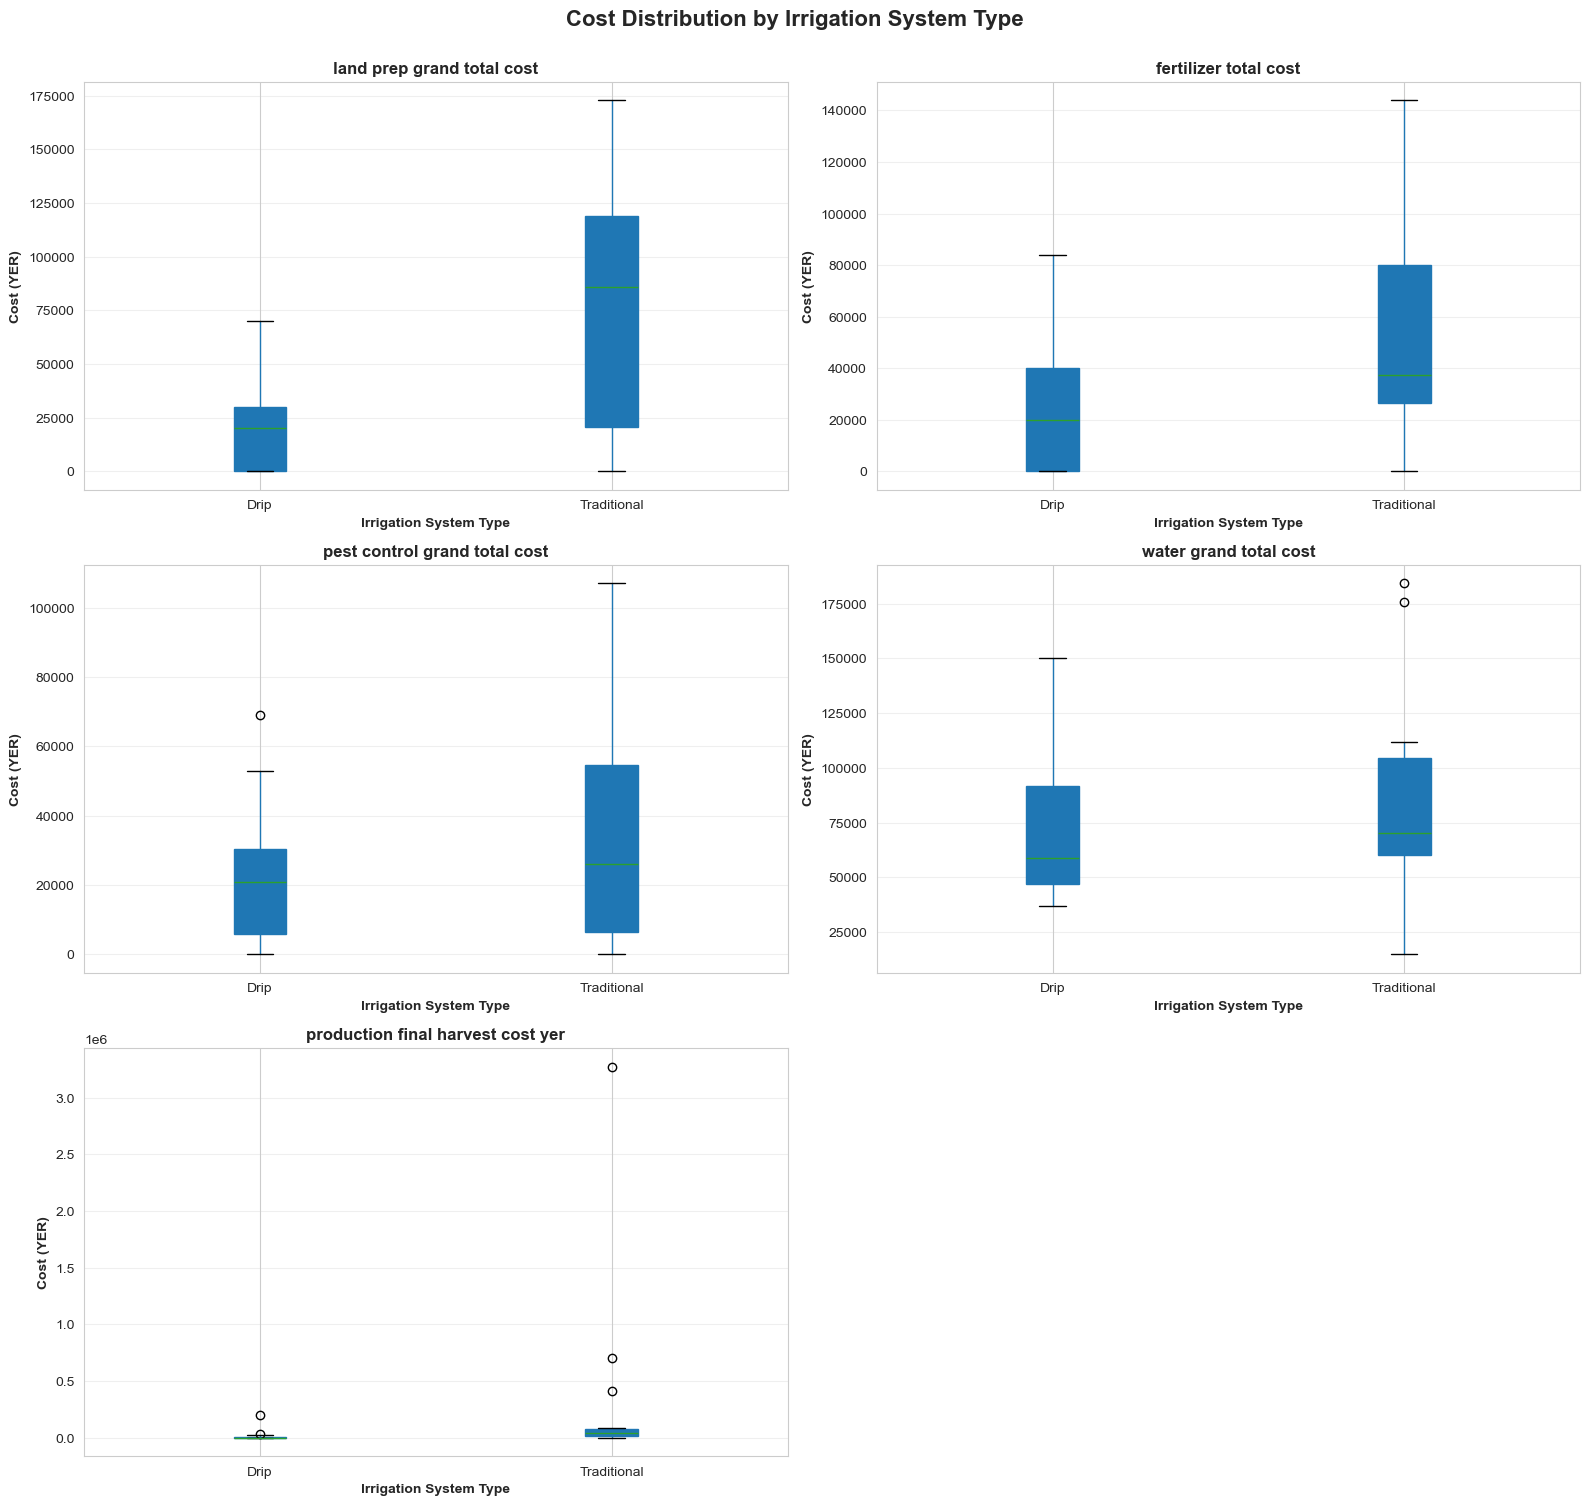

In [25]:
# Box plots for all major cost categories
n_costs = len(existing_major_costs)
n_rows = (n_costs + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_costs > 1 else [axes]

for idx, cost_col in enumerate(existing_major_costs):
    ax = axes[idx]
    
    # Box plot
    df.boxplot(column=cost_col, by='irrigation_system_type', ax=ax, patch_artist=True)
    
    ax.set_title(cost_col.replace('_', ' '), fontweight='bold', fontsize=12)
    ax.set_xlabel('Irrigation System Type', fontweight='bold')
    ax.set_ylabel('Cost (YER)', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplots
for idx in range(n_costs, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Cost Distribution by Irrigation System Type', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

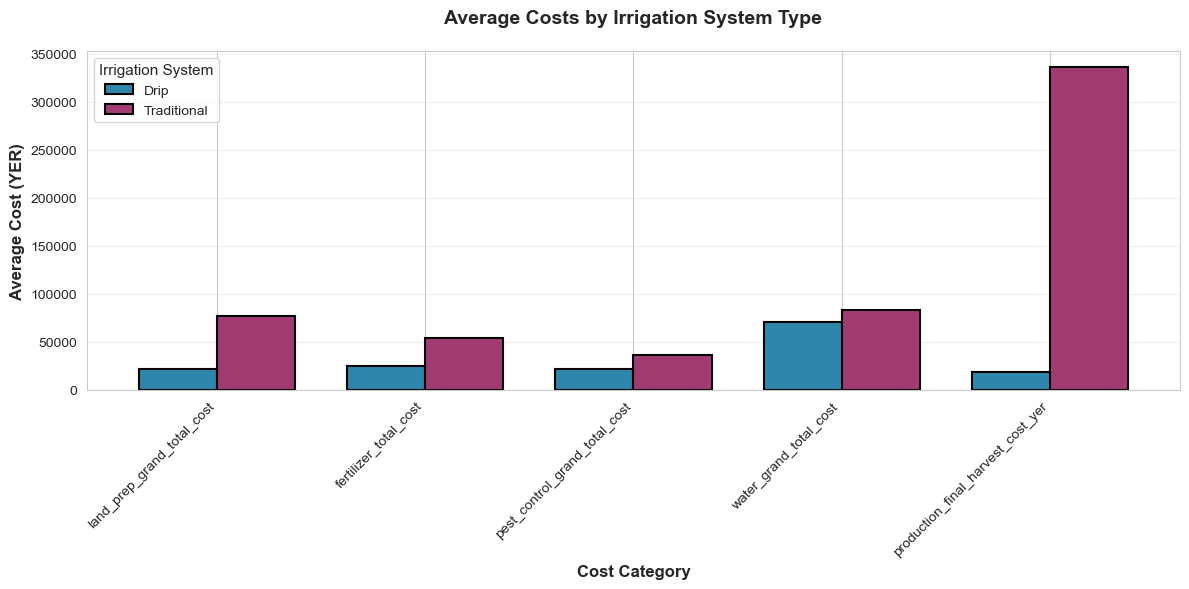


Mean Costs by Irrigation System (YER):


irrigation_system_type,Drip,Traditional
land_prep_grand_total_cost,21733.33,77200.00
fertilizer_total_cost,25380.00,54566.67
pest_control_grand_total_cost,22133.33,35893.33
water_grand_total_cost,70826.67,82888.00
production_final_harvest_cost_yer,19057.14,336242.86


In [26]:
# Bar chart comparison of mean costs
mean_costs_by_system = df.groupby('irrigation_system_type')[existing_major_costs].mean()

plt.figure(figsize=(14, 7))
mean_costs_by_system.T.plot(kind='bar', color=['#2E86AB', '#A23B72'], 
                             edgecolor='black', linewidth=1.5, width=0.75)

plt.xlabel('Cost Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Cost (YER)', fontsize=12, fontweight='bold')
plt.title('Average Costs by Irrigation System Type', fontsize=14, fontweight='bold', pad=20)
plt.legend(title='Irrigation System', title_fontsize=11, fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMean Costs by Irrigation System (YER):")
display(mean_costs_by_system.T)

## 6. Statistical Significance Tests

In [27]:
# Function to calculate Cohen's d (effect size)
def cohens_d(group1, group2):
    """
    Calculate Cohen's d for effect size.
    Small effect: d = 0.2
    Medium effect: d = 0.5
    Large effect: d = 0.8
    """
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    
    # Cohen's d
    d = (group1.mean() - group2.mean()) / pooled_std
    
    return d

def interpret_effect_size(d):
    """Interpret Cohen's d effect size"""
    abs_d = abs(d)
    if abs_d < 0.2:
        return "Negligible"
    elif abs_d < 0.5:
        return "Small"
    elif abs_d < 0.8:
        return "Medium"
    else:
        return "Large"

print("✓ Statistical functions defined")

✓ Statistical functions defined


In [28]:
# Perform t-tests for all cost categories
print("INDEPENDENT T-TEST RESULTS")
print("=" * 100)
print("\nComparing costs between irrigation systems\n")

if 'irrigation_system_type' in df.columns:
    irrigation_types = df['irrigation_system_type'].unique()
    
    if len(irrigation_types) == 2:
        system1, system2 = irrigation_types[0], irrigation_types[1]
        
        # Store results
        results = []
        
        for cost_col in existing_major_costs:
            # Get data for each group
            group1 = df[df['irrigation_system_type'] == system1][cost_col].dropna()
            group2 = df[df['irrigation_system_type'] == system2][cost_col].dropna()
            
            if len(group1) > 1 and len(group2) > 1:
                # Perform t-test
                t_stat, p_value = stats.ttest_ind(group1, group2)
                
                # Calculate effect size (Cohen's d)
                effect_size = cohens_d(group1, group2)
                effect_interpretation = interpret_effect_size(effect_size)
                
                # Calculate means
                mean1 = group1.mean()
                mean2 = group2.mean()
                diff = mean1 - mean2
                
                # Determine significance
                significant = "Yes ✓" if p_value < 0.05 else "No"
                
                results.append({
                    'Cost_Category': cost_col.replace('_', ' '),
                    f'{system1}_Mean': mean1,
                    f'{system2}_Mean': mean2,
                    'Difference': diff,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'Significant_05': significant,
                    'Cohens_d': effect_size,
                    'Effect_Size': effect_interpretation
                })
        
        # Create results DataFrame
        results_df = pd.DataFrame(results)
        display(results_df)
        
        # Save results for later use
        test_results = results_df
    else:
        print(f"⚠ Warning: Found {len(irrigation_types)} irrigation types. T-test requires exactly 2 groups.")
else:
    print("⚠ Warning: 'Irrigation_System_Type' column not found!")

INDEPENDENT T-TEST RESULTS

Comparing costs between irrigation systems



,Cost_Category,Traditional_Mean,Drip_Mean,Difference,t_statistic,p_value,Significant_05,Cohens_d,Effect_Size
0,land prep grand total cost,77200.00,21733.33,55466.67,3.38,0.00,Yes ✓,1.23,Large
1,fertilizer total cost,54566.67,25380.00,29186.67,2.16,0.04,Yes ✓,0.79,Medium
2,pest control grand total cost,35893.33,22133.33,13760.00,1.24,0.22,No,0.45,Small
3,water grand total cost,82888.00,70826.67,12061.33,0.79,0.44,No,0.29,Small
4,production final harvest cost yer,336242.86,19057.14,317185.71,1.36,0.18,No,0.52,Medium


## 7. Detailed Results for Each Cost Category

In [29]:
# Detailed breakdown for each cost category
print("DETAILED STATISTICAL ANALYSIS BY COST CATEGORY")
print("=" * 100)

if len(irrigation_types) == 2:
    for cost_col in existing_major_costs:
        print(f"\n{'='*100}")
        print(f"{cost_col.replace('_', ' ').upper()}")
        print(f"{'='*100}")
        
        # Get data
        group1 = df[df['irrigation_system_type'] == system1][cost_col].dropna()
        group2 = df[df['irrigation_system_type'] == system2][cost_col].dropna()
        
        if len(group1) > 1 and len(group2) > 1:
            # Statistics
            t_stat, p_value = stats.ttest_ind(group1, group2)
            effect_size = cohens_d(group1, group2)
            
            print(f"\n{system1}:")
            print(f"  n = {len(group1)}")
            print(f"  Mean = {group1.mean():,.2f} YER")
            print(f"  Std Dev = {group1.std():,.2f} YER")
            print(f"  95% CI = [{group1.mean() - 1.96*group1.std()/np.sqrt(len(group1)):,.2f}, {group1.mean() + 1.96*group1.std()/np.sqrt(len(group1)):,.2f}]")
            
            print(f"\n{system2}:")
            print(f"  n = {len(group2)}")
            print(f"  Mean = {group2.mean():,.2f} YER")
            print(f"  Std Dev = {group2.std():,.2f} YER")
            print(f"  95% CI = [{group2.mean() - 1.96*group2.std()/np.sqrt(len(group2)):,.2f}, {group2.mean() + 1.96*group2.std()/np.sqrt(len(group2)):,.2f}]")
            
            print(f"\nStatistical Test Results:")
            print(f"  Difference in means = {group1.mean() - group2.mean():,.2f} YER")
            print(f"  t-statistic = {t_stat:.4f}")
            print(f"  p-value = {p_value:.4f}")
            print(f"  Cohen's d = {effect_size:.4f} ({interpret_effect_size(effect_size)} effect)")
            
            # Interpretation
            print(f"\nInterpretation:")
            if p_value < 0.001:
                print(f"  ✓✓✓ HIGHLY SIGNIFICANT (p < 0.001)")
            elif p_value < 0.01:
                print(f"  ✓✓ VERY SIGNIFICANT (p < 0.01)")
            elif p_value < 0.05:
                print(f"  ✓ SIGNIFICANT (p < 0.05)")
            else:
                print(f"  ✗ NOT SIGNIFICANT (p >= 0.05)")
            
            if abs(effect_size) >= 0.8:
                print(f"  The difference is PRACTICALLY SIGNIFICANT (large effect size)")
            elif abs(effect_size) >= 0.5:
                print(f"  The difference is MODERATELY MEANINGFUL (medium effect size)")
            elif abs(effect_size) >= 0.2:
                print(f"  The difference is SMALL but detectable")
            else:
                print(f"  The difference is NEGLIGIBLE in practical terms")

DETAILED STATISTICAL ANALYSIS BY COST CATEGORY

LAND PREP GRAND TOTAL COST

Traditional:
  n = 15
  Mean = 77,200.00 YER
  Std Dev = 59,214.44 YER
  95% CI = [47,233.36, 107,166.64]

Drip:
  n = 15
  Mean = 21,733.33 YER
  Std Dev = 22,992.13 YER
  95% CI = [10,097.71, 33,368.96]

Statistical Test Results:
  Difference in means = 55,466.67 YER
  t-statistic = 3.3819
  p-value = 0.0021
  Cohen's d = 1.2349 (Large effect)

Interpretation:
  ✓✓ VERY SIGNIFICANT (p < 0.01)
  The difference is PRACTICALLY SIGNIFICANT (large effect size)

FERTILIZER TOTAL COST

Traditional:
  n = 15
  Mean = 54,566.67 YER
  Std Dev = 44,493.93 YER
  95% CI = [32,049.63, 77,083.70]

Drip:
  n = 15
  Mean = 25,380.00 YER
  Std Dev = 27,670.10 YER
  95% CI = [11,377.00, 39,383.00]

Statistical Test Results:
  Difference in means = 29,186.67 YER
  t-statistic = 2.1574
  p-value = 0.0397
  Cohen's d = 0.7878 (Medium effect)

Interpretation:
  ✓ SIGNIFICANT (p < 0.05)
  The difference is MODERATELY MEANINGFUL (med

## 8. Visualization of Significance Results

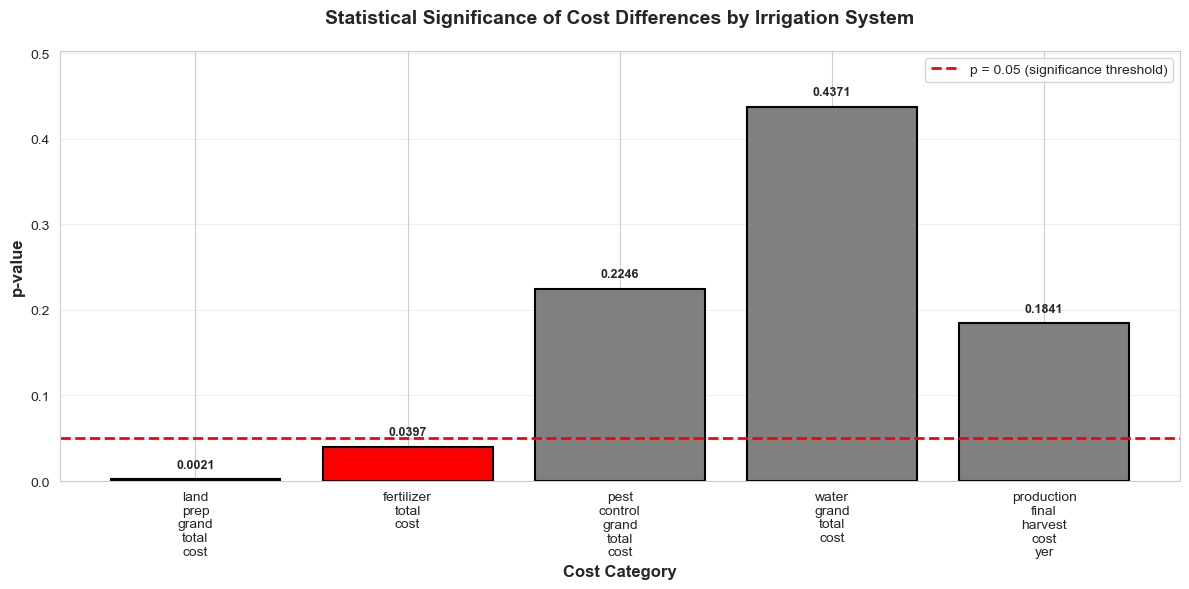

In [30]:
# Visualization of p-values
if 'test_results' in locals():
    plt.figure(figsize=(12, 6))
    
    colors = ['red' if p < 0.05 else 'gray' for p in test_results['p_value']]
    
    bars = plt.bar(range(len(test_results)), test_results['p_value'], color=colors, 
                   edgecolor='black', linewidth=1.5)
    
    # Add significance threshold line
    plt.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='p = 0.05 (significance threshold)')
    
    plt.xticks(range(len(test_results)), 
               [cat.replace(' ', '\n') for cat in test_results['Cost_Category']], 
               rotation=0, ha='center')
    
    plt.ylabel('p-value', fontsize=12, fontweight='bold')
    plt.xlabel('Cost Category', fontsize=12, fontweight='bold')
    plt.title('Statistical Significance of Cost Differences by Irrigation System', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (bar, p_val) in enumerate(zip(bars, test_results['p_value'])):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{p_val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.ylim(0, max(test_results['p_value']) * 1.15)
    plt.tight_layout()
    plt.show()

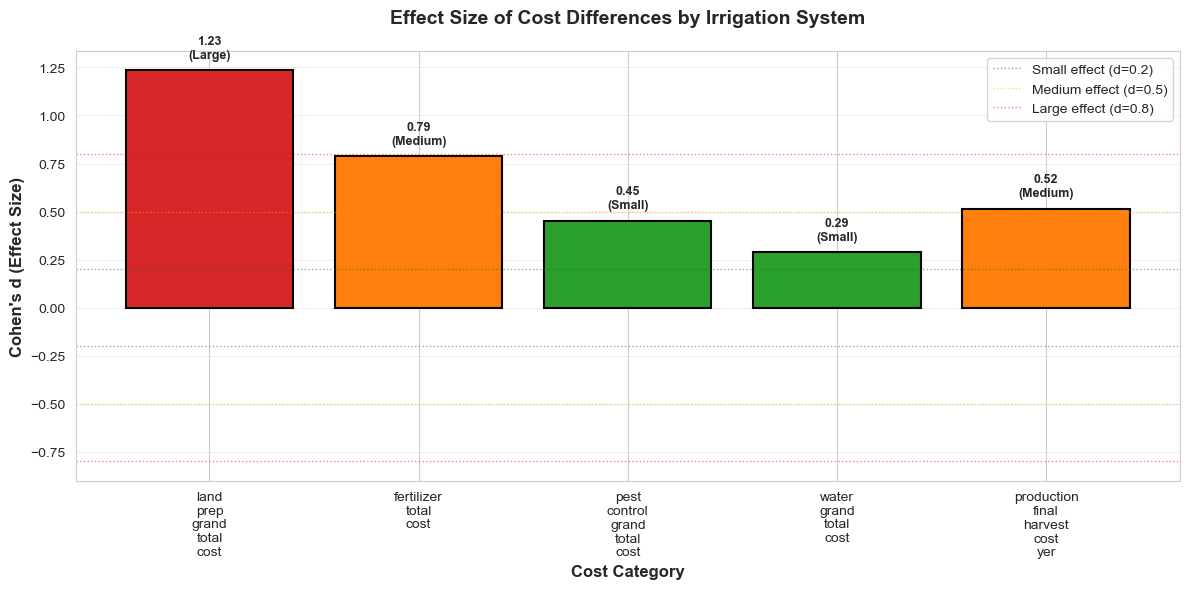

In [31]:
# Visualization of effect sizes
if 'test_results' in locals():
    plt.figure(figsize=(12, 6))
    
    # Color based on effect size magnitude
    colors = []
    for d in test_results['Cohens_d'].abs():
        if d >= 0.8:
            colors.append('#d62728')  # Red - Large
        elif d >= 0.5:
            colors.append('#ff7f0e')  # Orange - Medium
        elif d >= 0.2:
            colors.append('#2ca02c')  # Green - Small
        else:
            colors.append('#7f7f7f')  # Gray - Negligible
    
    bars = plt.bar(range(len(test_results)), test_results['Cohens_d'], color=colors,
                   edgecolor='black', linewidth=1.5)
    
    # Add reference lines
    plt.axhline(y=0.2, color='green', linestyle=':', linewidth=1, alpha=0.5, label='Small effect (d=0.2)')
    plt.axhline(y=0.5, color='orange', linestyle=':', linewidth=1, alpha=0.5, label='Medium effect (d=0.5)')
    plt.axhline(y=0.8, color='red', linestyle=':', linewidth=1, alpha=0.5, label='Large effect (d=0.8)')
    plt.axhline(y=-0.2, color='green', linestyle=':', linewidth=1, alpha=0.5)
    plt.axhline(y=-0.5, color='orange', linestyle=':', linewidth=1, alpha=0.5)
    plt.axhline(y=-0.8, color='red', linestyle=':', linewidth=1, alpha=0.5)
    
    plt.xticks(range(len(test_results)), 
               [cat.replace(' ', '\n') for cat in test_results['Cost_Category']], 
               rotation=0, ha='center')
    
    plt.ylabel("Cohen's d (Effect Size)", fontsize=12, fontweight='bold')
    plt.xlabel('Cost Category', fontsize=12, fontweight='bold')
    plt.title('Effect Size of Cost Differences by Irrigation System', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='best')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (bar, d_val, effect) in enumerate(zip(bars, test_results['Cohens_d'], test_results['Effect_Size'])):
        y_pos = bar.get_height() + (0.05 if bar.get_height() > 0 else -0.1)
        plt.text(bar.get_x() + bar.get_width()/2, y_pos,
                f'{d_val:.2f}\n({effect})', ha='center', va='bottom' if bar.get_height() > 0 else 'top',
                fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()

## 9. Summary of Findings

In [32]:
print("=" * 100)
print("SUMMARY OF STATISTICAL FINDINGS")
print("=" * 100)

if 'test_results' in locals() and len(irrigation_types) == 2:
    # Overall summary
    total_tests = len(test_results)
    significant_tests = len(test_results[test_results['p_value'] < 0.05])
    
    print(f"\n📊 Overall Summary:")
    print(f"  • Total cost categories tested: {total_tests}")
    print(f"  • Statistically significant differences (p < 0.05): {significant_tests}/{total_tests}")
    print(f"  • Percentage significant: {(significant_tests/total_tests*100):.1f}%")
    
    # Significant findings
    if significant_tests > 0:
        print(f"\n✓ SIGNIFICANT COST DIFFERENCES FOUND:")
        print("-" * 100)
        
        significant_results = test_results[test_results['p_value'] < 0.05].sort_values('p_value')
        
        for idx, row in significant_results.iterrows():
            print(f"\n{row['Cost_Category'].upper()}:")
            print(f"  • {system1}: {row[f'{system1}_Mean']:,.2f} YER")
            print(f"  • {system2}: {row[f'{system2}_Mean']:,.2f} YER")
            print(f"  • Difference: {row['Difference']:,.2f} YER")
            print(f"  • p-value: {row['p_value']:.4f}")
            print(f"  • Effect size: {row['Cohens_d']:.2f} ({row['Effect_Size']})")
            
            # Determine which is higher
            higher_system = system1 if row['Difference'] > 0 else system2
            percent_diff = abs(row['Difference'] / row[f'{system2}_Mean'] * 100)
            print(f"  • {higher_system} costs {percent_diff:.1f}% more")
    else:
        print(f"\n✗ NO SIGNIFICANT COST DIFFERENCES FOUND")
        print("  All cost categories show similar values between irrigation systems (p >= 0.05)")
    
    # Non-significant findings
    non_significant = test_results[test_results['p_value'] >= 0.05]
    if len(non_significant) > 0:
        print(f"\n○ NON-SIGNIFICANT COST DIFFERENCES:")
        print("-" * 100)
        for idx, row in non_significant.iterrows():
            print(f"  • {row['Cost_Category']}: p = {row['p_value']:.4f}")
    
    # Effect size summary
    print(f"\n📈 Effect Size Summary:")
    print("-" * 100)
    effect_counts = test_results['Effect_Size'].value_counts()
    for effect, count in effect_counts.items():
        print(f"  • {effect} effect: {count} cost categories")
    
print("\n" + "=" * 100)

SUMMARY OF STATISTICAL FINDINGS

📊 Overall Summary:
  • Total cost categories tested: 5
  • Statistically significant differences (p < 0.05): 2/5
  • Percentage significant: 40.0%

✓ SIGNIFICANT COST DIFFERENCES FOUND:
----------------------------------------------------------------------------------------------------

LAND PREP GRAND TOTAL COST:
  • Traditional: 77,200.00 YER
  • Drip: 21,733.33 YER
  • Difference: 55,466.67 YER
  • p-value: 0.0021
  • Effect size: 1.23 (Large)
  • Traditional costs 255.2% more

FERTILIZER TOTAL COST:
  • Traditional: 54,566.67 YER
  • Drip: 25,380.00 YER
  • Difference: 29,186.67 YER
  • p-value: 0.0397
  • Effect size: 0.79 (Medium)
  • Traditional costs 115.0% more

○ NON-SIGNIFICANT COST DIFFERENCES:
----------------------------------------------------------------------------------------------------
  • pest control grand total cost: p = 0.2246
  • water grand total cost: p = 0.4371
  • production final harvest cost yer: p = 0.1841

📈 Effect Size 

## 10. Conclusions and Recommendations

### 📌 Statistical Testing Interpretation Guide

#### **p-value Interpretation:**
- **p < 0.001**: Highly significant (very strong evidence of difference)
- **p < 0.01**: Very significant (strong evidence of difference)
- **p < 0.05**: Significant (evidence of difference)
- **p >= 0.05**: Not significant (insufficient evidence of difference)

#### **Cohen's d (Effect Size) Interpretation:**
- **|d| < 0.2**: Negligible practical difference
- **0.2 ≤ |d| < 0.5**: Small practical difference
- **0.5 ≤ |d| < 0.8**: Medium practical difference
- **|d| ≥ 0.8**: Large practical difference

### 🎯 Key Takeaways

1. **Statistical Significance vs Practical Significance**:
   - A result can be statistically significant (p < 0.05) but have a small effect size
   - Focus on both p-values AND effect sizes for decision-making

2. **Cost-Effective Irrigation System**:
   - Identify which irrigation system has significantly lower costs
   - Consider both statistical and practical significance
   - Balance cost savings with production output

3. **Action Items**:
   - For significant differences with large effect sizes: Prioritize cost reduction strategies
   - For non-significant differences: Systems perform similarly in that cost category
   - Combine with production analysis for ROI calculations

### 📊 Next Steps

1. Conduct cost-benefit analysis (cost per kg of production)
2. Analyze water efficiency (cost per liter used)
3. Calculate ROI for each irrigation system
4. Consider farmer preferences and local conditions

---

**End of Statistical Significance Testing** 🎉